# Data Loading and Preprocessing
In this section, we performed Data Preprocessing techniques on the given datasets.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

# Read the train, test, and starter datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("revealed_test.csv")
census_starter_df = pd.read_csv("census_starter.csv")

# Print all datasets
train_df
test_df
census_starter_df

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0


In [ ]:
train_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [ ]:
test_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247


In [ ]:
census_starter_df.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


Here, I combined the census starter data columns to the test and training datasets, since there were missing features and labels from both datasets.

In [ ]:
# Merge the census starter data on the cfips column
train_df = pd.merge(train_df, census_starter_df, on=["cfips"])
train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


In [ ]:
# Merge the census starter data on the cfips column
test_df = pd.merge(test_df, census_starter_df, on=["cfips"])
test_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145,74.5,78.1,81.8,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133,74.5,78.1,81.8,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247,57.2,60.4,60.5,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,56041_2022-12-01,56041,Uinta County,Wyoming,2022-12-01,4.050703,588,83.8,88.2,89.5,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
6266,56043_2022-11-01,56043,Washakie County,Wyoming,2022-11-01,3.143093,190,76.4,78.3,78.2,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0
6267,56043_2022-12-01,56043,Washakie County,Wyoming,2022-12-01,3.060380,185,76.4,78.3,78.2,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0
6268,56045_2022-11-01,56045,Weston County,Wyoming,2022-11-01,1.785395,100,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


I then dropped duplicates and null values from the datasets.

In [ ]:
# Drop duplicates and null values for both datasets
train_df = train_df.drop_duplicates()
train_df = train_df.dropna()
test_df = test_df.drop_duplicates()
test_df = test_df.dropna()

After that I printed the info of the datasets.

In [ ]:
# Print info to verify results
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122148 entries, 0 to 122264
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122148 non-null  object 
 1   cfips                  122148 non-null  int64  
 2   county                 122148 non-null  object 
 3   state                  122148 non-null  object 
 4   first_day_of_month     122148 non-null  object 
 5   microbusiness_density  122148 non-null  float64
 6   active                 122148 non-null  int64  
 7   pct_bb_2017            122148 non-null  float64
 8   pct_bb_2018            122148 non-null  float64
 9   pct_bb_2019            122148 non-null  float64
 10  pct_bb_2020            122148 non-null  float64
 11  pct_bb_2021            122148 non-null  float64
 12  pct_college_2017       122148 non-null  float64
 13  pct_college_2018       122148 non-null  float64
 14  pct_college_2019       122148 non-null  f

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6264 entries, 0 to 6269
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   row_id                 6264 non-null   object 
 1   cfips                  6264 non-null   int64  
 2   county                 6264 non-null   object 
 3   state                  6264 non-null   object 
 4   first_day_of_month     6264 non-null   object 
 5   microbusiness_density  6264 non-null   float64
 6   active                 6264 non-null   int64  
 7   pct_bb_2017            6264 non-null   float64
 8   pct_bb_2018            6264 non-null   float64
 9   pct_bb_2019            6264 non-null   float64
 10  pct_bb_2020            6264 non-null   float64
 11  pct_bb_2021            6264 non-null   float64
 12  pct_college_2017       6264 non-null   float64
 13  pct_college_2018       6264 non-null   float64
 14  pct_college_2019       6264 non-null   float64
 15  pct_colle

Training has 122,148 rows of data (this is too much!)
- I reduce training data to 21K by random sampling (highest # I could set it before lazy predict crashes)

In [ ]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df = train_df_shuffled.head(21000)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 11129 to 83104
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   row_id                 21000 non-null  object 
 1   cfips                  21000 non-null  int64  
 2   county                 21000 non-null  object 
 3   state                  21000 non-null  object 
 4   first_day_of_month     21000 non-null  object 
 5   microbusiness_density  21000 non-null  float64
 6   active                 21000 non-null  int64  
 7   pct_bb_2017            21000 non-null  float64
 8   pct_bb_2018            21000 non-null  float64
 9   pct_bb_2019            21000 non-null  float64
 10  pct_bb_2020            21000 non-null  float64
 11  pct_bb_2021            21000 non-null  float64
 12  pct_college_2017       21000 non-null  float64
 13  pct_college_2018       21000 non-null  float64
 14  pct_college_2019       21000 non-null  float64
 15  pct

# Exporatory Data Analysis (EDA)
In this section, we conducted Exporatory Data Analysis to explore patterns within the dataset.

Here, I plotted the mean microbusiness density curve over time for all US cities.

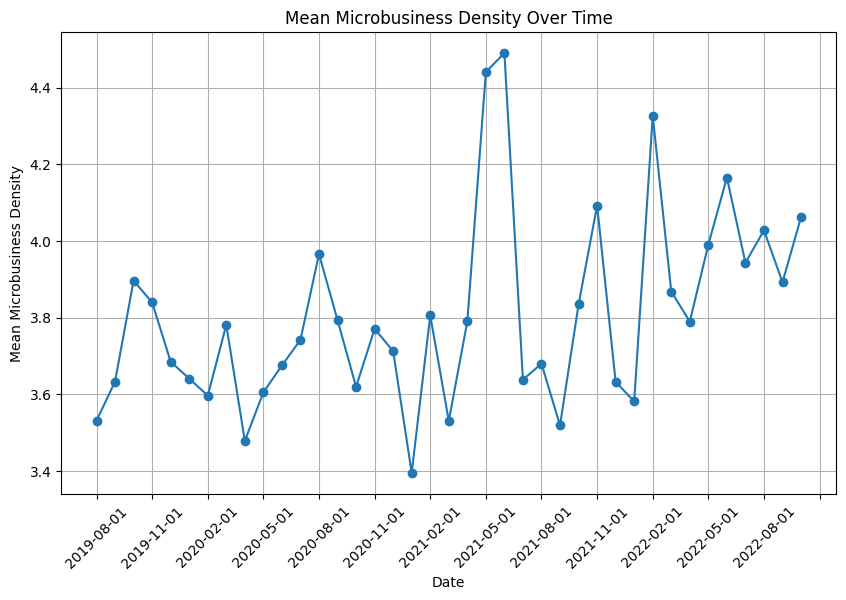

In [ ]:
import matplotlib.pyplot as plt

# Mean Microbusiness Density of all counties
plt.figure(figsize=(10, 6))
mean_density = train_df.groupby('first_day_of_month')['microbusiness_density'].mean().reset_index()
plt.plot(mean_density['first_day_of_month'], mean_density['microbusiness_density'], marker='o')
plt.title('Mean Microbusiness Density Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Microbusiness Density')

# Set tick locator to a specified interval
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))  # Set tick locator to every 3 months

plt.grid(True)
plt.show();


Observations
- Mean microbusiness density slowly increased from 2019 to 2022.

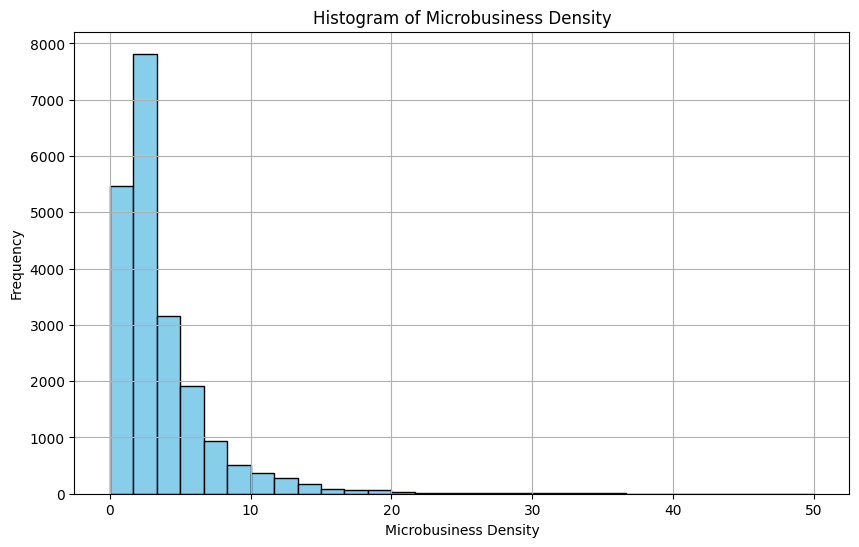

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(train_df['microbusiness_density'], bins=30, range=(0, 50), color='skyblue', edgecolor='black')
plt.title('Histogram of Microbusiness Density')
plt.xlabel('Microbusiness Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show();


Most Microbusiness density levels are under 50 and majority of them fall under 10. Which means less than 10 microbusiness per every 100 people is most common.

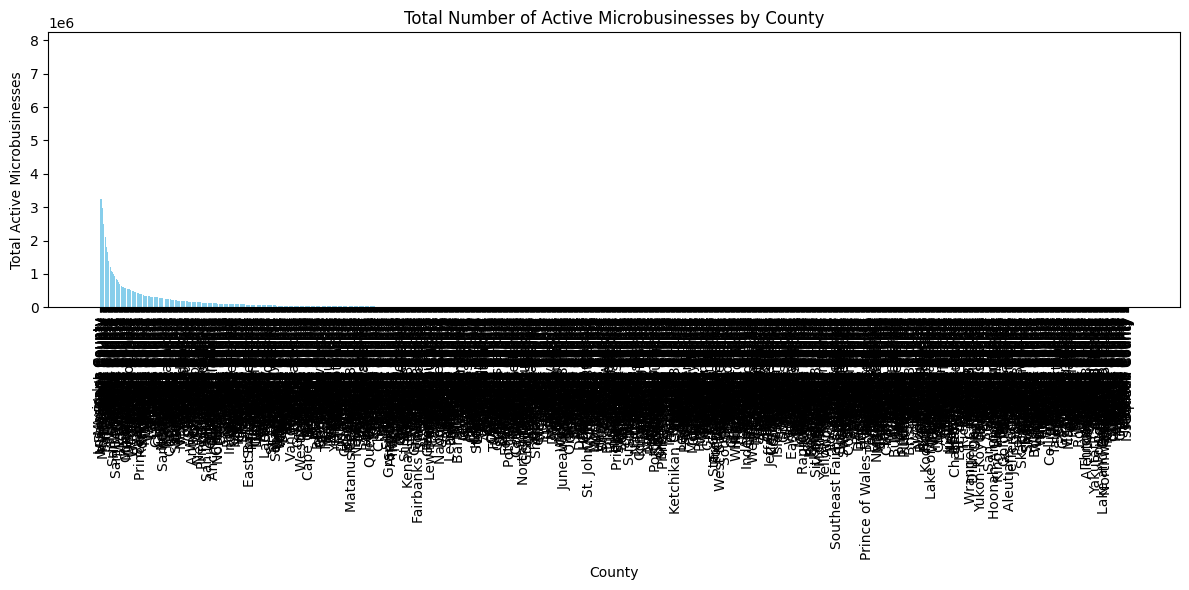

In [ ]:
import matplotlib.pyplot as plt

# Group by county and calculate the total number of active microbusinesses
county_active_counts = train_df.groupby('county')['active'].sum().reset_index()

# Sort the data by the total number of active microbusinesses
county_active_counts = county_active_counts.sort_values(by='active', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(county_active_counts['county'],county_active_counts['active'], color='skyblue')
plt.title('Total Number of Active Microbusinesses by County')
plt.xlabel('County')
plt.ylabel('Total Active Microbusinesses')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();


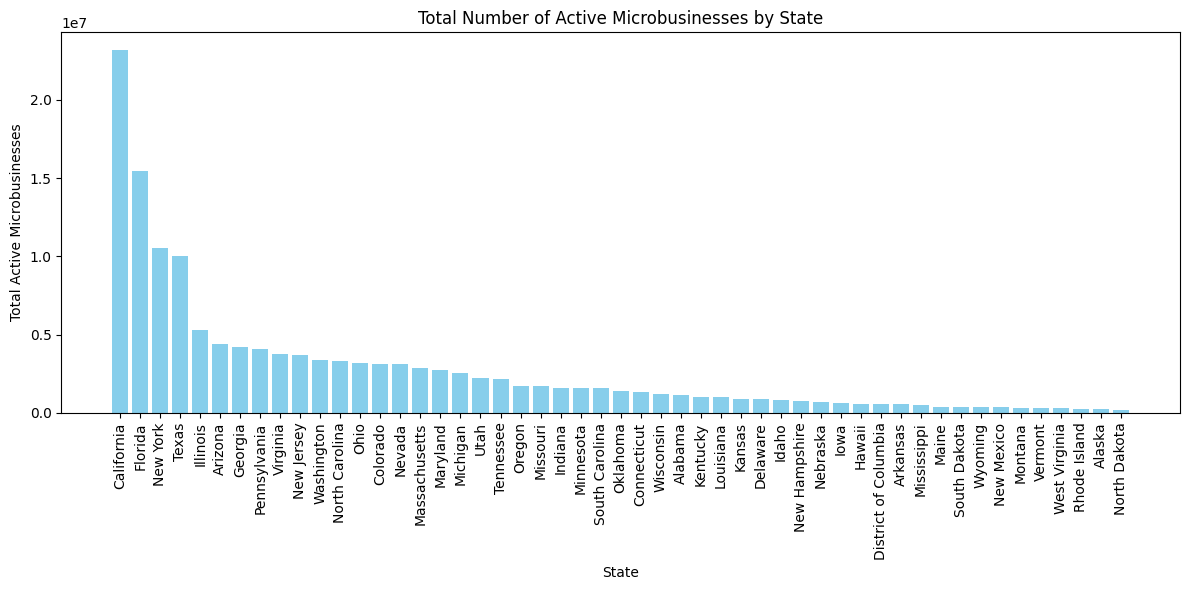

Top 5 States with the Highest Active Microbusinesses:
         state    active
4   California  23158091
9      Florida  15474600
32    New York  10545775
43       Texas  10038942
13    Illinois   5279862


In [ ]:
# Group by state and calculate the total number of active microbusinesses
state_active_counts = train_df.groupby('state')['active'].sum().reset_index()

# Sort the data by the total number of active microbusinesses
state_active_counts = state_active_counts.sort_values(by='active', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(state_active_counts['state'], state_active_counts['active'], color='skyblue')
plt.title('Total Number of Active Microbusinesses by State')
plt.xlabel('State')
plt.ylabel('Total Active Microbusinesses')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Display the top 5 states with the highest number of active microbusinesses
top_states = state_active_counts.head(5)
print("Top 5 States with the Highest Active Microbusinesses:")
print(top_states);


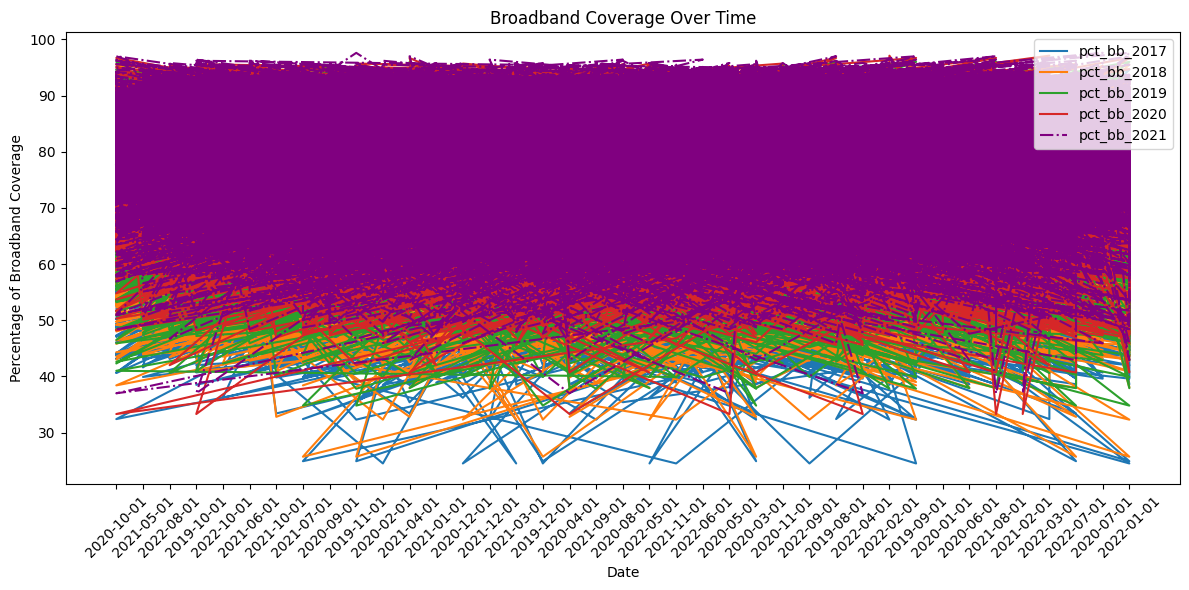

In [ ]:
import matplotlib.pyplot as plt

# Extract the relevant columns
bb_coverage_columns = ['first_day_of_month', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021']
bb_coverage_df = train_df[bb_coverage_columns]

# Set 'first_day_of_month' as the index
bb_coverage_df.set_index('first_day_of_month', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
for column in bb_coverage_df.columns:
    if column == 'pct_bb_2021':  # Adjust the color and line style for the purple line
        plt.plot(bb_coverage_df.index, bb_coverage_df[column], label=column, color='purple', linestyle='-.')
    else:
        plt.plot(bb_coverage_df.index, bb_coverage_df[column], label=column)

plt.title('Broadband Coverage Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Broadband Coverage')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

# Feature Engineering
- In this section, I performed Target Encoding on the Categorical Features(coutny & state) and Standard Scaling on the numerical features.
- Then, I split the transformed dataframes into the features and label datasets.

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_df_transformed = train_df
test_df_transformed = test_df

In [ ]:
# Use target encoding
county_target_mean = train_df_transformed.groupby('county')['microbusiness_density'].mean()
train_df_transformed['county'] = train_df_transformed['county'].map(county_target_mean)
state_target_mean = train_df_transformed.groupby('state')['microbusiness_density'].mean()
train_df_transformed['state'] = train_df_transformed['state'].map(state_target_mean)
date_target_mean = train_df_transformed.groupby('first_day_of_month')['microbusiness_density'].mean()
train_df_transformed['first_day_of_month'] = train_df_transformed['first_day_of_month'].map(date_target_mean)

# apply scaling
train_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']] = scaler.fit_transform(train_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']])

# Use target encoding
county_target_mean = test_df_transformed.groupby('county')['microbusiness_density'].mean()
test_df_transformed['county'] = test_df_transformed['county'].map(county_target_mean)
state_target_mean = test_df_transformed.groupby('state')['microbusiness_density'].mean()
test_df_transformed['state'] = test_df_transformed['state'].map(state_target_mean)
date_target_mean = test_df_transformed.groupby('first_day_of_month')['microbusiness_density'].mean()
test_df_transformed['first_day_of_month'] = test_df_transformed['first_day_of_month'].map(date_target_mean)

# apply scaling
test_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']] = scaler.fit_transform(test_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']])


<ipython-input-13-4f85eae26aca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_transformed['county'] = train_df_transformed['county'].map(county_target_mean)
<ipython-input-13-4f85eae26aca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_transformed['state'] = train_df_transformed['state'].map(state_target_mean)
<ipython-input-13-4f85eae26aca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
train_df_features = train_df_transformed.drop(['microbusiness_density'], axis=1)
train_df_label = train_df_transformed[['microbusiness_density']]
test_df_features = test_df_transformed.drop(['microbusiness_density'], axis=1)
test_df_label = test_df_transformed[['microbusiness_density']]

In [ ]:
train_df_features.head(5)
train_df_label.head(5)
test_df_features.head(5)
test_df_label.head(5)

,row_id,cfips,county,state,first_day_of_month,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
11129,8085_2020-10-01,8085,6.020952,8.638330,3.619351,-0.139103,0.225958,0.241016,0.227485,-0.101938,...,-0.717256,-0.814732,-0.043826,0.084362,0.526329,-0.371039,-0.206423,-0.210493,-0.028493,-0.066278
54543,27173_2021-05-01,27173,1.984984,3.313403,4.440514,-0.190799,0.308396,0.284179,0.453732,0.324014,...,-0.224006,-0.193638,-0.255496,-0.510704,-0.182944,0.370565,0.390430,0.402002,0.290414,0.433674
111459,51085_2022-08-01,51085,6.106622,4.474583,4.027714,-0.045065,1.359479,1.384855,1.200350,1.175918,...,0.663844,0.634487,0.591184,0.381895,0.526329,2.668932,2.697308,2.521610,2.482473,2.481045
110450,51033_2019-10-01,51033,3.566782,4.474583,3.896228,-0.175032,-0.340802,-0.374068,-0.202386,0.117123,...,-0.618606,0.116909,-0.149661,-0.510704,-0.588243,0.846769,0.955855,0.815881,0.877508,1.172723
115205,53015_2022-10-01,53015,3.215228,5.099356,4.062130,-0.111874,0.803023,0.758981,0.815729,0.908177,...,-0.421306,-0.504185,-0.573001,-0.510704,-0.486918,0.003479,0.012777,0.071630,0.256464,0.401067


,microbusiness_density
11129,5.867363
54543,1.946246
111459,6.079740
110450,2.948211
115205,3.350294


,row_id,cfips,county,state,first_day_of_month,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2022-11-01,1001,3.456796,2.402751,4.015642,-0.154913,0.686486,0.668946,0.586036,0.502719,...,-0.128850,-0.300289,-0.681433,-0.718719,-0.181083,0.423287,0.525850,0.369580,0.200166,0.282839
1,1001_2022-12-01,1001,3.456796,2.402751,4.037795,-0.154567,0.686486,0.668946,0.586036,0.502719,...,-0.128850,-0.300289,-0.681433,-0.718719,-0.181083,0.423287,0.525850,0.369580,0.200166,0.282839
2,1003_2022-11-01,1003,5.337405,2.402751,4.015642,0.211517,0.469757,0.582411,0.721978,0.794462,...,-0.027428,-0.087890,0.064621,-0.314748,0.025454,0.213350,0.319429,0.340582,0.457901,0.391396
3,1003_2022-12-01,1003,5.337405,2.402751,4.037795,0.211170,0.469757,0.582411,0.721978,0.794462,...,-0.027428,-0.087890,0.064621,-0.314748,0.025454,0.213350,0.319429,0.340582,0.457901,0.391396
4,1005_2022-11-01,1005,1.085539,2.402751,4.015642,-0.190048,-1.315677,-1.332183,-1.690990,-1.697513,...,-0.940225,-1.149888,-0.574854,-0.213755,-0.490888,-1.249279,-1.272292,-1.479347,-1.370008,-1.406544


,microbusiness_density
0,3.442677
1,3.470915
2,8.257636
3,8.250630
4,1.247223


Removing column identifiers

In [ ]:
train_df_features = train_df_features.drop(['row_id', 'cfips'], axis=1)
test_df_features = test_df_features.drop(['row_id', 'cfips'], axis=1)
train_df_features.head()
test_df_features.head()

,county,state,first_day_of_month,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
11129,6.020952,8.638330,3.619351,-0.139103,0.225958,0.241016,0.227485,-0.101938,0.123244,0.343811,...,-0.717256,-0.814732,-0.043826,0.084362,0.526329,-0.371039,-0.206423,-0.210493,-0.028493,-0.066278
54543,1.984984,3.313403,4.440514,-0.190799,0.308396,0.284179,0.453732,0.324014,0.276207,-0.358660,...,-0.224006,-0.193638,-0.255496,-0.510704,-0.182944,0.370565,0.390430,0.402002,0.290414,0.433674
111459,6.106622,4.474583,4.027714,-0.045065,1.359479,1.384855,1.200350,1.175918,1.168490,2.054959,...,0.663844,0.634487,0.591184,0.381895,0.526329,2.668932,2.697308,2.521610,2.482473,2.481045
110450,3.566782,4.474583,3.896228,-0.175032,-0.340802,-0.374068,-0.202386,0.117123,0.250713,-0.052455,...,-0.618606,0.116909,-0.149661,-0.510704,-0.588243,0.846769,0.955855,0.815881,0.877508,1.172723
115205,3.215228,5.099356,4.062130,-0.111874,0.803023,0.758981,0.815729,0.908177,0.849818,-0.754926,...,-0.421306,-0.504185,-0.573001,-0.510704,-0.486918,0.003479,0.012777,0.071630,0.256464,0.401067


,county,state,first_day_of_month,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,3.456796,2.402751,4.015642,-0.154913,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,...,-0.128850,-0.300289,-0.681433,-0.718719,-0.181083,0.423287,0.525850,0.369580,0.200166,0.282839
1,3.456796,2.402751,4.037795,-0.154567,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,...,-0.128850,-0.300289,-0.681433,-0.718719,-0.181083,0.423287,0.525850,0.369580,0.200166,0.282839
2,5.337405,2.402751,4.015642,0.211517,0.469757,0.582411,0.721978,0.794462,0.933245,1.178879,...,-0.027428,-0.087890,0.064621,-0.314748,0.025454,0.213350,0.319429,0.340582,0.457901,0.391396
3,5.337405,2.402751,4.037795,0.211170,0.469757,0.582411,0.721978,0.794462,0.933245,1.178879,...,-0.027428,-0.087890,0.064621,-0.314748,0.025454,0.213350,0.319429,0.340582,0.457901,0.391396
4,1.085539,2.402751,4.015642,-0.190048,-1.315677,-1.332183,-1.690990,-1.697513,-2.026517,-1.114344,...,-0.940225,-1.149888,-0.574854,-0.213755,-0.490888,-1.249279,-1.272292,-1.479347,-1.370008,-1.406544


Save the data files to csv

In [ ]:
train_df_features.to_csv("X_train.csv")
train_df_label.to_csv("y_train.csv")
test_df_features.to_csv("X_test.csv")
test_df_label.to_csv("y_test.csv")

# Feature Selection

## Using Principal Component Analysis

We will be using Principle Component Analysis (PCA) to try to reduce dimensionality.


PCA(n_components=0)

PCA(n_components=1)

PCA(n_components=2)

PCA(n_components=3)

PCA(n_components=4)

PCA(n_components=5)

PCA(n_components=6)

PCA(n_components=7)

PCA(n_components=8)

PCA(n_components=9)

PCA(n_components=10)

PCA(n_components=11)

PCA(n_components=12)

PCA(n_components=13)

PCA(n_components=14)

PCA(n_components=15)

PCA(n_components=16)

PCA(n_components=17)

PCA(n_components=18)

PCA(n_components=19)

PCA(n_components=20)

PCA(n_components=21)

PCA(n_components=22)

PCA(n_components=23)

PCA(n_components=24)

PCA(n_components=25)

PCA(n_components=26)

PCA(n_components=27)

PCA(n_components=28)

<Figure size 600x300 with 0 Axes>

Text(0.5, 0, 'n_components')

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

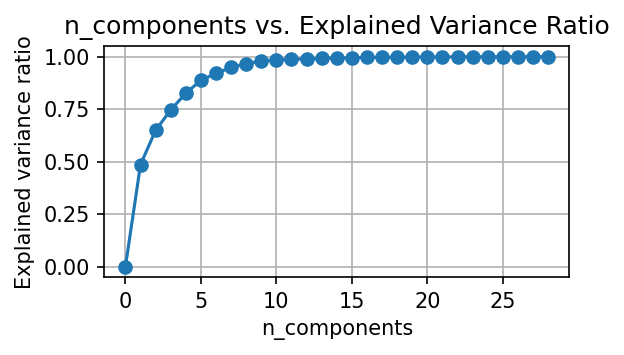

In [ ]:
# Importing and initiating PCA
from sklearn.decomposition import PCA

import numpy as np
nums = np.arange(29)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(train_df_features)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

import matplotlib.pyplot as plt

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

Pick 16 features as to maximize explained variance with the minimum features.

In [ ]:
# Setting up for PCA
train_shape = train_df_features.shape
PCA_size = 16

pca = PCA(n_components = PCA_size)

# Fitting X_train
pca.fit(train_df_features)

PCA(n_components=16)

In [ ]:
# Transforming train_df_features
train_transformed = pca.transform(train_df_features)

# Turning training into a df
train_df_transformed = pd.DataFrame(train_transformed)

# Transforming test_df_features
test_transformed = pca.transform(test_df_features)

# Turning test into a df
test_df_transformed = pd.DataFrame(test_transformed)
test_df_transformed.columns = [test_df_features.columns[i] for i in range(PCA_size)]

In [ ]:
train_df_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.986854,1.408209,1.934470,-2.232039,3.085387,-1.079907,-0.673041,-0.341428,-0.932089,0.102418,-0.057222,-0.173857,0.144323,0.364055,-0.125549,-0.179106
1,-1.425661,-1.511784,-0.900700,-0.780432,-0.072303,0.919586,0.468061,0.216188,0.099314,0.030185,0.065758,-0.232746,-0.047088,0.017294,0.590443,0.244349
2,6.688605,-3.198529,-2.892398,-0.824177,-0.382331,-0.992372,1.954479,-0.037007,0.057983,-0.063652,0.043156,-0.066915,-0.226751,0.008500,0.169633,0.153847
3,0.324842,-0.675115,-0.358664,-1.283451,0.189710,0.057766,1.799944,0.124423,0.203832,-0.747540,-0.425412,-0.220541,-0.125198,-0.240218,0.153087,-0.131634
4,-0.206761,-0.640310,0.213862,-1.985581,0.906695,1.880872,-0.385701,0.155389,0.099102,-0.041735,0.057199,-0.013907,0.270321,0.049806,0.327239,-0.096932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-3.575455,0.290022,0.598176,0.313946,0.907006,-0.425583,0.653811,0.119331,-0.278624,-0.254726,-0.177862,0.171793,-0.027086,0.437607,-0.072675,-0.276801
20996,-4.642167,1.532952,0.619364,2.094452,1.618128,0.961458,-0.736271,-0.032675,-0.072114,0.263470,-1.205918,0.299662,0.003919,0.410519,-0.256901,0.181255
20997,1.473345,-0.352971,0.608868,-3.786440,3.886251,1.092899,0.992509,0.337650,-0.795860,-0.211898,0.170417,0.149358,0.212472,-0.111765,0.099234,-0.276447
20998,-2.492732,1.722155,-0.396412,0.224172,0.450723,0.613696,0.228082,0.145608,-0.178360,-0.761949,-0.102847,-0.097950,0.029348,-0.114649,0.066790,0.039504


In [ ]:
train_df_transformed.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04
mean,-2.747432e-16,-3.099320e-16,-8.323501e-17,1.556427e-16,-2.774500e-16,-1.150403e-17,-2.131628e-17,1.607180e-17,4.229421e-19,1.894781e-17,1.311121e-17,-2.030122e-18,-1.015061e-18,1.767898e-17,-3.578936e-16,-1.750134e-16
std,4.523149e+00,2.619074e+00,2.024208e+00,1.828426e+00,1.611599e+00,1.177568e+00,1.090967e+00,8.415364e-01,7.676752e-01,4.159951e-01,3.935732e-01,3.148047e-01,2.921644e-01,2.574497e-01,2.492503e-01,2.455059e-01
min,-1.067420e+01,-1.177713e+01,-8.293756e+00,-7.222714e+00,-6.092016e+00,-6.546995e+00,-3.904286e+00,-3.995437e+00,-6.206799e+00,-2.763441e+00,-2.549317e+00,-2.221519e+00,-1.737908e+00,-1.752602e+00,-1.205620e+00,-1.512398e+00
25%,-2.774830e+00,-1.310858e+00,-1.174849e+00,-1.003028e+00,-9.011891e-01,-7.136318e-01,-6.675375e-01,-1.741293e-01,-2.951236e-01,-2.145877e-01,-1.744077e-01,-1.335166e-01,-1.476050e-01,-1.173391e-01,-1.696663e-01,-1.423526e-01
50%,-8.372880e-01,-1.454386e-01,-3.754947e-01,-1.297509e-01,-1.970776e-01,1.044790e-01,-7.878080e-02,4.181663e-02,3.089918e-02,2.836437e-03,-1.289503e-02,-4.036137e-03,5.002905e-03,-6.780077e-04,-3.433503e-02,-1.206831e-02
75%,1.565454e+00,1.129111e+00,5.979688e-01,8.335122e-01,6.111870e-01,8.026221e-01,5.657571e-01,1.929418e-01,3.415983e-01,2.087398e-01,1.704078e-01,1.320008e-01,1.518433e-01,1.107767e-01,1.318821e-01,1.351197e-01
max,5.279923e+01,6.192686e+01,1.684422e+01,2.044414e+01,1.176530e+01,6.759952e+00,5.939095e+00,2.988319e+01,7.876905e+00,3.034179e+00,3.090851e+00,3.224499e+00,1.870860e+00,2.409075e+00,1.273058e+00,1.995297e+00


In [ ]:
# Shape sanity check
train_df_transformed.shape
test_df_transformed.shape
train_df_label.shape
test_df_label.shape

(21000, 16)

(6264, 16)

(21000, 1)

(6264, 1)

## Testing with LazyPredict

I will be using LazyPredict to be able to test and score multiple models quickly.

Documentation for LazyPredict can be found here:
https://github.com/shankarpandala/lazypredict

In [ ]:
# Installing LazyPredict
!pip install lazypredict

In [ ]:
# Importing Regression for Lazy Predict
from lazypredict.Supervised import LazyRegressor

# Setting proper variables for ease of use
X_train = train_df_transformed
X_test = test_df_transformed
y_train = train_df_label
y_test = test_df_label

In [ ]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test,  np.array(y_train).ravel(),  np.array(y_test).ravel())
models.head()

 98%|█████████▊| 41/42 [12:05<00:05,  5.77s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 16
[LightGBM] [Info] Start training from score 3.807296


100%|██████████| 42/42 [12:06<00:00, 17.30s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.83,0.83,2.59,28.90
KNeighborsRegressor,0.71,0.71,3.36,0.75
GradientBoostingRegressor,0.66,0.66,3.65,15.85
ExtraTreesRegressor,0.59,0.59,3.98,18.54
XGBRegressor,0.59,0.59,3.99,0.96


With 21K training examples, the model with the highest R^2 from Lazy Predict is MLPRegressor, or the feed forward neural network regressor, with a R^2 score of 0.83.

# Evaluate the best model

## Evaluating MLPRegressor


In [ ]:
import lazypredict

# Find the best model based on accuracy (or another metric)
best_model_name = models.index[0]
best_model_info = models.loc[best_model_name]

print("Best Model:", best_model_name)
print("Model Details:", best_model_info)

# Get the best model class and train it
from sklearn.neural_network import MLPRegressor
best_model = MLPRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

Best Model: MLPRegressor
Model Details: Adjusted R-Squared    0.83
R-Squared             0.83
RMSE                  2.59
Time Taken           28.90
Name: MLPRegressor, dtype: float64


MLPRegressor(random_state=42)

In [ ]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# Function to evaluate between actual and predicted labels
def evaluate(y_true, y_pred):
    mean_squared_error=metrics.mean_squared_error(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)

    print (f"Mean Squared Error on test data {mean_squared_error}")
    print (f"Mean Absolute Error on test data {mean_absolute_error}")
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # sMAPE calculation
    epsilon = 1e-8  # to avoid division by zero
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_pred) + np.abs(y_true)) / 2
    smape = 100 * np.mean(numerator / (denominator + epsilon))

    print(f"Symmetric Mean Absolute Percentage Error (sMAPE) on test data: {smape:.2f}%")


evaluate(y_test, y_pred)

Mean Squared Error on test data 6.414615387889699
Mean Absolute Error on test data 1.0518612715631002
Symmetric Mean Absolute Percentage Error (sMAPE) on test data: 75.76%


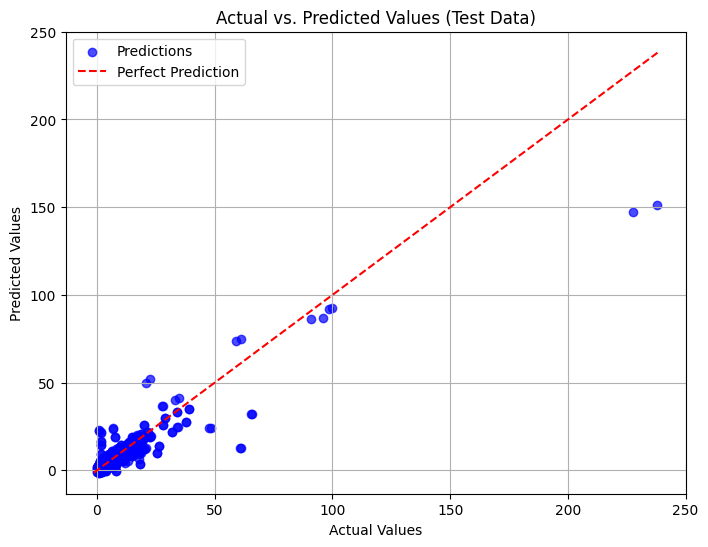

In [ ]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 6))  # Optional, sets figure size
    plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predictions')  # Scatter plot
    min_val = min(np.min(y_test), np.min(y_pred))  # Ensure consistent data types
    max_val = max(np.max(y_test), np.max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')  # Reference line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Test Data)")
    plt.legend()
    plt.grid(True)  # Optional, adds grid
    plt.show()  # Display the plot

# Plot the predictions
plot_predictions(y_test, y_pred)

## Testing with K-Fold

In [ ]:
from sklearn.model_selection import KFold

# Putting the features and labels into a numpy array for sklearn's data splitter
features = train_df_transformed.to_numpy()
labels = train_df_label.to_numpy()

# set k = 5
k = 5

kf = KFold(n_splits=k)

folds_data = [] # this is an inefficient way but still do it

fold = 1
for train_index, validation_index in kf.split(features):
    x_train , x_valid = features[train_index,:], features[validation_index,:]
    y_train , y_valid = labels[train_index,:] , labels[validation_index,:]
    print (f"Fold {fold} training data shape = {(x_train.shape,y_train.shape)}")
    print (f"Fold {fold} validation data shape = {(x_valid.shape,y_valid.shape)}")
    fold+=1
    folds_data.append((x_train,y_train,x_valid,y_valid))

Fold 1 training data shape = ((16800, 16), (16800, 1))
Fold 1 validation data shape = ((4200, 16), (4200, 1))
Fold 2 training data shape = ((16800, 16), (16800, 1))
Fold 2 validation data shape = ((4200, 16), (4200, 1))
Fold 3 training data shape = ((16800, 16), (16800, 1))
Fold 3 validation data shape = ((4200, 16), (4200, 1))
Fold 4 training data shape = ((16800, 16), (16800, 1))
Fold 4 validation data shape = ((4200, 16), (4200, 1))
Fold 5 training data shape = ((16800, 16), (16800, 1))
Fold 5 validation data shape = ((4200, 16), (4200, 1))


In [ ]:
# Intiate MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mlp = MLPRegressor(random_state = 42)

# Define lists to store the validation scores for each fold
mse_scores = []
mae_scores = []
sMAPE_scores = []

#Iterate over all folds
for i, fold in enumerate(folds_data):
    x_train, y_train, x_valid, y_valid = fold

    # Train the model
    _mlp = mlp.fit(x_train,y_train.flatten())

    # Make predictions on the validation set
    y_pred = _mlp.predict(x_valid)

    # sMAPE calculation
    epsilon = 1e-8  # to avoid division by zero
    numerator = np.abs(y_pred - y_valid)
    denominator = (np.abs(y_pred) + np.abs(y_valid)) / 2
    smape = 100 * np.mean(numerator / (denominator + epsilon))

    # Calculate the mean squared error for this fold
    mse = mean_squared_error(y_valid, y_pred)

    # Calculate the mean absolute error for this fold
    mae = mean_absolute_error(y_valid, y_pred)

    # Append the validation scores to the lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    sMAPE_scores.append(smape)

    # Print the MSE for this fold
    print(f'Fold {i + 1}, MSE: {mse}')
    print(f'Fold {i + 1}, MAE: {mae}')
    print(f'Fold {i + 1}, sMAPE: {smape}')

# Calculate the average validation score across all folds
avg_mse_scores = sum(mse_scores) / len(mse_scores)
print(f'\nAverage Validation MSE: {avg_mse_scores}')

avg_mae_scores = sum(mae_scores) / len(mae_scores)
print(f'\nAverage Validation MAE: {avg_mae_scores}')
avg_sMAPE_scores = sum(sMAPE_scores) / len(sMAPE_scores)
print(f'\nAverage Validation MSE: {avg_sMAPE_scores}')

Fold 1, MSE: 4.744275692197331
Fold 1, MAE: 0.9752318859472037
Fold 1, sMAPE: 78.72943744323547
Fold 2, MSE: 3.3508810533585263
Fold 2, MAE: 0.9669015276163312
Fold 2, sMAPE: 78.22720320650699
Fold 3, MSE: 3.561148894202596
Fold 3, MAE: 0.9660850707234262
Fold 3, sMAPE: 75.5085128473136
Fold 4, MSE: 11.493738796256986
Fold 4, MAE: 0.9631813572794623
Fold 4, sMAPE: 75.67593887686951
Fold 5, MSE: 3.3411366469149386
Fold 5, MAE: 0.9752884036528442
Fold 5, sMAPE: 77.36245247337364

Average Validation MSE: 5.2982362165860755

Average Validation MAE: 0.9693376490438534

Average Validation MSE: 77.10070896945983


After attempting to use cross-validation to decrease MSE, MAE, and sMAPE it seems to have minimal effect. I have a feeling this is because of some extreme outliers which heavily affected the mean.

## Addressing possible outliers

First we need to explore possible outliers created from taking only 21k rows from the 121k we started with.

In [ ]:
train_df_label.describe()

,microbusiness_density
count,21000.000000
mean,3.807296
std,4.789411
min,0.000000
25%,1.635650
50%,2.575117
75%,4.500595
max,184.430820


Text(0.5, 0, 'Index')

Text(0, 0.5, 'microbusiness density')

Text(0.5, 1.0, 'Scatter Plot of Microbusiness Density (Train)')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'microbusiness density')

Text(0.5, 1.0, 'Scatter Plot of Microbusiness Density (Test)')

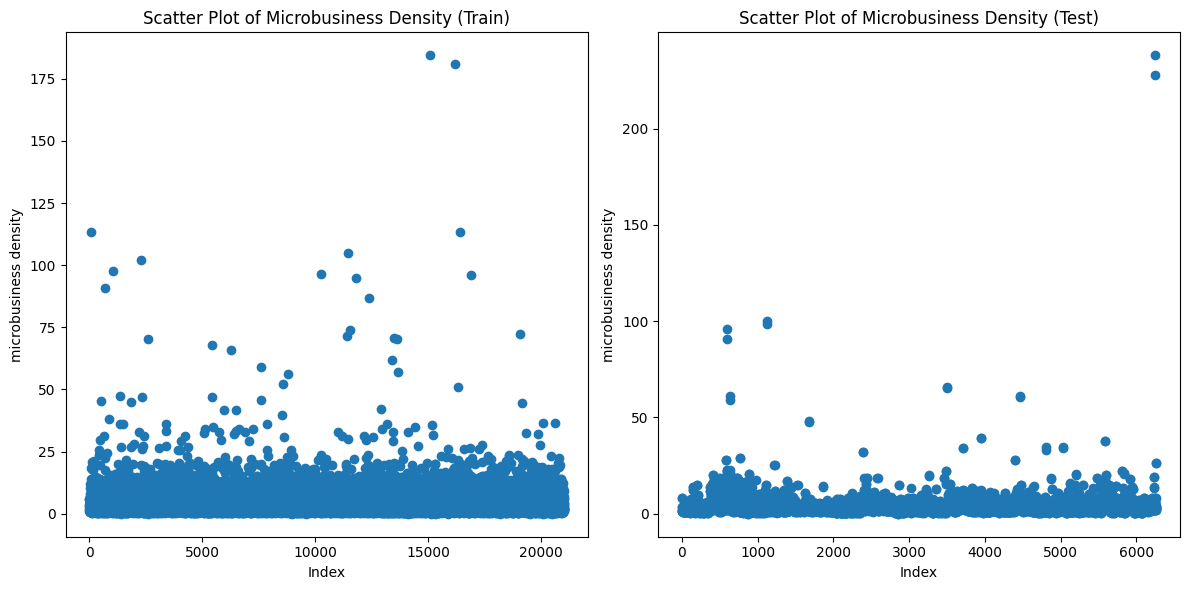

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting microbusiness_density train
axs[0].scatter(range(len(train_df_label['microbusiness_density'])), train_df_label['microbusiness_density'])
axs[0].set_xlabel('Index')
axs[0].set_ylabel('microbusiness density')
axs[0].set_title('Scatter Plot of Microbusiness Density (Train)')

# Plotting microbusiness_density test
axs[1].scatter(range(len(test_df_label['microbusiness_density'])), test_df_label['microbusiness_density'])
axs[1].set_xlabel('Index')
axs[1].set_ylabel('microbusiness density')
axs[1].set_title('Scatter Plot of Microbusiness Density (Test)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


As we can see, there are some significant outliers for this distribution of data. To solve this we will remove microbusinesses density greater than 25 and rerun our model with evaluations to see if this addresses our high sMAPE.

In [ ]:
# Removing rows where the microbusiness_density is higher than 25
train_df = train_df[train_df['microbusiness_density'] <= 25]
test_df = test_df[test_df['microbusiness_density'] <= 25]

In [ ]:
train_df.shape
test_df.shape

(20900, 32)

(6228, 32)

In [ ]:
train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
11129,8085_2020-10-01,8085,6.020952,8.638330,3.619351,5.867363,-0.139103,0.225958,0.241016,0.227485,...,-0.717256,-0.814732,-0.043826,0.084362,0.526329,-0.371039,-0.206423,-0.210493,-0.028493,-0.066278
54543,27173_2021-05-01,27173,1.984984,3.313403,4.440514,1.946246,-0.190799,0.308396,0.284179,0.453732,...,-0.224006,-0.193638,-0.255496,-0.510704,-0.182944,0.370565,0.390430,0.402002,0.290414,0.433674
111459,51085_2022-08-01,51085,6.106622,4.474583,4.027714,6.079740,-0.045065,1.359479,1.384855,1.200350,...,0.663844,0.634487,0.591184,0.381895,0.526329,2.668932,2.697308,2.521610,2.482473,2.481045
110450,51033_2019-10-01,51033,3.566782,4.474583,3.896228,2.948211,-0.175032,-0.340802,-0.374068,-0.202386,...,-0.618606,0.116909,-0.149661,-0.510704,-0.588243,0.846769,0.955855,0.815881,0.877508,1.172723
115205,53015_2022-10-01,53015,3.215228,5.099356,4.062130,3.350294,-0.111874,0.803023,0.758981,0.815729,...,-0.421306,-0.504185,-0.573001,-0.510704,-0.486918,0.003479,0.012777,0.071630,0.256464,0.401067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74223,37033_2020-02-01,37033,1.512321,3.893999,3.596478,1.339843,-0.187830,-0.948781,-1.032315,-1.141315,...,-0.224006,-0.504185,0.167844,0.084362,-0.081619,-0.783319,-0.554030,-0.544517,-0.483402,-0.319560
70145,35011_2021-07-01,35011,1.804009,3.311114,3.638024,1.935964,-0.194392,-0.515983,-1.043106,-0.813255,...,-0.026706,0.220424,1.543700,0.976961,-0.081619,-1.389114,-1.494925,-1.535353,-1.601826,-1.637253
108583,49023_2020-03-01,49023,4.032960,8.873754,3.781110,3.991597,-0.186701,0.761804,0.521580,0.453732,...,-0.914556,-0.814732,-0.890506,-0.014815,0.019705,0.593881,0.775577,0.560236,0.906958,1.058020
50507,26133_2019-10-01,26133,3.537192,3.362098,3.896228,1.962323,-0.184771,-1.165181,-0.816497,-0.609632,...,-0.421306,-0.090123,-0.149661,-0.113993,-0.081619,-0.656610,-0.646570,-0.663982,-0.549460,-0.483685


In [ ]:
import pickle
train_df.to_csv("new_train.csv")

### Feature Engineering


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler_outlier = StandardScaler()
train_df_transformed = train_df
test_df_transformed = test_df

In [ ]:
# Use target encoding for train
county_target_mean = train_df_transformed.groupby('county')['microbusiness_density'].mean()
train_df_transformed['county'] = train_df_transformed['county'].map(county_target_mean)
state_target_mean = train_df_transformed.groupby('state')['microbusiness_density'].mean()
train_df_transformed['state'] = train_df_transformed['state'].map(state_target_mean)
date_target_mean = train_df_transformed.groupby('first_day_of_month')['microbusiness_density'].mean()
train_df_transformed['first_day_of_month'] = train_df_transformed['first_day_of_month'].map(date_target_mean)

# apply scaling
train_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']] = scaler_outlier.fit_transform(train_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']])

# Use target encoding for test
county_target_mean = test_df_transformed.groupby('county')['microbusiness_density'].mean()
test_df_transformed['county'] = test_df_transformed['county'].map(county_target_mean)
state_target_mean = test_df_transformed.groupby('state')['microbusiness_density'].mean()
test_df_transformed['state'] = test_df_transformed['state'].map(state_target_mean)
date_target_mean = test_df_transformed.groupby('first_day_of_month')['microbusiness_density'].mean()
test_df_transformed['first_day_of_month'] = test_df_transformed['first_day_of_month'].map(date_target_mean)

# apply scaling
test_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']] = scaler_outlier.fit_transform(test_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']])

In [ ]:
# Creating new label and features dataframes with outliers taken out
train_label_df = train_df_transformed[['microbusiness_density']]
train_features_df = train_df_transformed.drop(columns=['microbusiness_density'])

# Creating new label and features dataframes with outliers taken out
test_label_df = test_df_transformed[['microbusiness_density']]
test_features_df = test_df_transformed.drop(columns=['microbusiness_density'])

In [ ]:
train_features_df = train_features_df.drop(['row_id', 'cfips'], axis=1)
test_features_df = test_features_df.drop(['row_id', 'cfips'], axis=1)


In [ ]:
# Import pickle
import pickle
pickle.dump(scaler_outlier, open('scaler.pkl','wb'))

### PCA

In [ ]:
# Setting up for PCA
from sklearn.decomposition import PCA
train_shape = train_features_df.shape
PCA_size = 16

pca_outlier = PCA(n_components = PCA_size)

# Fitting X_train
pca_outlier.fit(train_features_df)

PCA(n_components=16)

In [ ]:
# Transforming train_df_features
train_transformed = pca_outlier.transform(train_features_df)

# Turning training into a df
train_df_transformed = pd.DataFrame(train_transformed)

# Transforming test_df_features
test_transformed = pca_outlier.transform(test_features_df)

# Turning training into a df
test_df_transformed = pd.DataFrame(test_transformed)

In [ ]:
train_df_transformed.shape
test_df_transformed.shape
train_label_df.shape
test_label_df.shape

(20900, 16)

(6228, 16)

(20900, 1)

(6228, 1)

In [ ]:
pickle.dump(pca_outlier, open('pca.pkl','wb'))

### Evaluating

In [ ]:
# Setting proper variables for ease of use
X_train = train_df_transformed
X_test = test_df_transformed
y_train = train_label_df
y_test = test_label_df

In [ ]:
# Get the best model class and train it
from sklearn.neural_network import MLPRegressor
best_model = MLPRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

MLPRegressor(random_state=42)

In [ ]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import numpy as np

# Function to evaluate between actual and predicted labels
def evaluate(y_true, y_pred):
    mean_squared_error = metrics.mean_squared_error(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)

    print (f"Mean Squared Error on test data {mean_squared_error}")
    print (f"Mean Absolute Error on test data {mean_absolute_error}")
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # sMAPE calculation
    epsilon = 1e-8  # to avoid division by zero
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_pred) + np.abs(y_true)) / 2
    smape = 100 * np.mean(numerator / (denominator + epsilon))

    print(f"Symmetric Mean Absolute Percentage Error (sMAPE) on test data: {smape:.2f}%")

    # r2 score
    r_squared = r2_score(y_true, y_pred)
    print(f'R^2 score is: {r_squared:.2f}')


evaluate(y_test, y_pred)

Mean Squared Error on test data 0.8867293000989274
Mean Absolute Error on test data 0.6113245929548222
Symmetric Mean Absolute Percentage Error (sMAPE) on test data: 72.98%
R^2 score is: 0.91


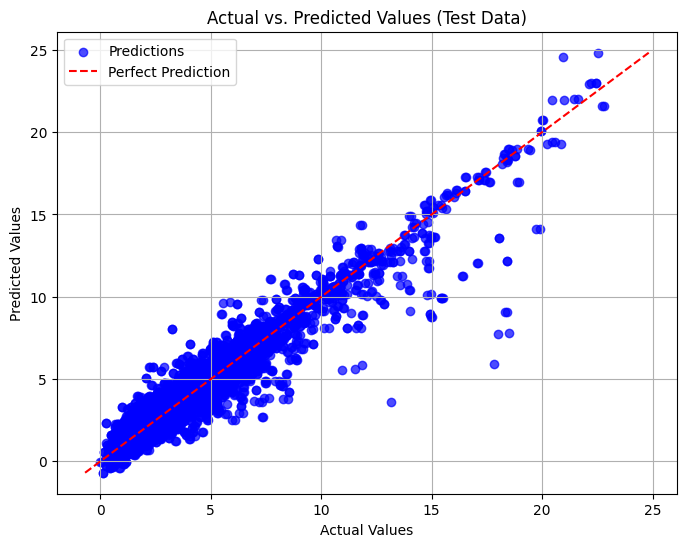

In [ ]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 6))  # Optional, sets figure size
    plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predictions')  # Scatter plot
    min_val = min(np.min(y_test), np.min(y_pred))  # Ensure consistent data types
    max_val = max(np.max(y_test), np.max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')  # Reference line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Test Data)")
    plt.legend()
    plt.grid(True)  # Optional, adds grid
    plt.show()  # Display the plot

# Plot the predictions
plot_predictions(y_test, y_pred)

### Pickle and Save Model

We have created our best model with the lowest MSE, MAE and sMAPE scores with our highest R2 score of .91! Now we need to pickle it and save it for our demo.

In [ ]:
# Import pickle
import pickle

# Pickle and save model
pickle.dump(best_model, open('MLPRmodel.pkl','wb'))